## **1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy**


In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [25]:
# Split the Independent and Dependet variable
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)

In [32]:
# pd.DataFrame(X)
# pd.DataFrame(y)

In [34]:
# Split the Training and Testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)
print(f"X_train Shape : {X_train.shape}\nX_test Shape : {X_test.shape}\ny_train Shape : {y_train.shape}\ny_test Shape : {y_test.shape}")

X_train Shape : (112, 4)
X_test Shape : (38, 4)
y_train Shape : (112,)
y_test Shape : (38,)


In [58]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
model_01 = LogisticRegression()

# Print the model's parameters (optional)
model_01

LogisticRegression()

In [42]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  # Solver algorithm
    'max_iter': [100, 500, 1000, 2000], # Maximum number of iterations
    'multi_class': ['auto', 'ovr', 'multinomial'], #multiclass options
    'l1_ratio': [0.25, 0.5, 0.75] #when using elasticnet penalty.
}

In [60]:
from sklearn.model_selection import GridSearchCV

grid_model_01 = GridSearchCV(model_01, param_grid, cv=5, scoring='accuracy', verbose = True)
grid_model_01 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [100, 500, 1000, 2000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [62]:
grid_model_01.fit(X_train,y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [100, 500, 1000, 2000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=True)

In [66]:
y_pred_01 = grid_model_01.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_01))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## **2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy**

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y = True)

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [107]:
from sklearn.linear_model import LogisticRegression
model_02 = LogisticRegression(penalty='l1',solver='liblinear')
model_02

LogisticRegression(penalty='l1', solver='liblinear')

In [109]:
model_02.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [117]:
from sklearn.metrics import classification_report
y_pred_02 = model_02.predict(X_test)
print(classification_report(y_test,y_pred_02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86        16
           2       0.69      1.00      0.82         9

    accuracy                           0.89        38
   macro avg       0.90      0.92      0.89        38
weighted avg       0.93      0.89      0.90        38



## **3.  Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')**

In [140]:
from sklearn.linear_model import LogisticRegression

model_03 = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio = 0.24)
model_03

LogisticRegression(l1_ratio=0.24, penalty='elasticnet', solver='saga')

In [142]:
model_03.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.24, penalty='elasticnet', solver='saga')

In [145]:
from sklearn.metrics import classification_report
y_pred_03 = model_03.predict(X_test)
print(classification_report(y_test,y_pred_03))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#  **4. Write a Python program to train a Logistic Regression model for multiclass classification using  multi_class='ovr'**

In [155]:
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [183]:
X,y = load_wine(return_X_y=True)
# pd.DataFrame(X,columns=load_wine().feature_names).head(2)
# pd.DataFrame(y)
# Split the Training and Testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)
print(f"X_train Shape : {X_train.shape}\nX_test Shape : {X_test.shape}\ny_train Shape : {y_train.shape}\ny_test Shape : {y_test.shape}")

X_train Shape : (133, 13)
X_test Shape : (45, 13)
y_train Shape : (133,)
y_test Shape : (45,)


In [187]:
model_04 = LogisticRegression(multi_class='ovr')
model_04

LogisticRegression(multi_class='ovr')

In [190]:
model_04.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [202]:
y_pred_04 = model_04.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_04)
print(f"Accuracy: {accuracy:.4f}")

#Example of predicting a new sample
new_sample = np.array([[14.23, 1.71, 2.43, 15.6, 127.0, 2.80, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]]) #Example wine data
prediction = model_04.predict(new_sample)
print(f"Prediction for new sample: {load_wine().target_names[prediction[0]]}")
print(classification_report(y_test,y_pred_04))

Accuracy: 0.9556
Prediction for new sample: class_0
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.89      1.00      0.94        17
           2       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# **5. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic**

In [25]:
import numpy as np 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [21]:
X,y = load_breast_cancer(return_X_y=True)
# pd.DataFrame(X,columns=load_breast_cancer().feature_names)
# pd.DataFrame(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [40]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.25, 0.5, 0.75]
}
# Create a Logistic Regression model
model_05 = LogisticRegression(multi_class='ovr', random_state=1, max_iter=1000)

# Create GridSearchCV object
grid_search = GridSearchCV(model_05, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [32]:

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
# Get the best model
best_model_05 = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_05 = best_model_05.predict(X_test)
print(classification_report(y_test,y_pred_05))

Best Parameters: {'C': 100, 'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9506976744186048
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# **6. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy**

In [44]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)  # Use 'liblinear' for smaller datasets

# Initialize Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy scores for each fold
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    logistic_regression.fit(X_train, y_train)

    # Make predictions
    y_pred = logistic_regression.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.4f}")

# Optionally, you can print the accuracy of each fold:
for i, accuracy in enumerate(accuracy_scores):
   print(f"Fold {i+1} Accuracy: {accuracy:.4f}")

Average Accuracy: 0.8120
Fold 1 Accuracy: 0.7650
Fold 2 Accuracy: 0.8300
Fold 3 Accuracy: 0.7900
Fold 4 Accuracy: 0.8250
Fold 5 Accuracy: 0.8500


# **7. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy**

In [47]:
import numpy as np 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

In [70]:
data_07 = pd.read_csv("C:/Users/PRAVIN/OneDrive/Desktop/Dataset/Logistic Regression/Social_Network_Ads.csv")
data_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [72]:
data_07["Gender"].unique()
data_07['Gender'] = data_07['Gender'].map({'Male':1,"Female":0})

In [80]:
# data_07.info()
X,y = data_07.drop("Purchased",axis=1),data_07['Purchased']
print(f" X Shape : {X.shape}\ny Shape : {y.shape}")
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(f"\n\nX_train Shape : {X_train.shape}\nX_test Shape : {X_test.shape}")
print(f" y_train Shape : {y_train.shape}\ny_test Shape : {y_test.shape}")

 X Shape : (400, 4)
y Shape : (400,)


X_train Shape : (300, 4)
X_test Shape : (100, 4)
 y_train Shape : (300,)
y_test Shape : (100,)


In [84]:
model_07 = LogisticRegression()
model_07

LogisticRegression()

In [86]:
model_07.fit(X_train,y_train)

LogisticRegression()

In [88]:
y_pred_07 = model_07.predict(X_test)

print(classification_report(y_test,y_pred_07))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        58
           1       0.82      0.76      0.79        42

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



# **8. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy**

In [92]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': np.linspace(0,1,20) #for elasticnet
}

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=10000)  # Increase max_iter

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1, #use all available cores.
    scoring='accuracy'
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Accuracy (Cross-validation):", best_score)

# Evaluate the model on the test set using the best parameters
best_logreg = LogisticRegression(**best_params, random_state=42, max_iter=10000)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.7894736842105263, 'C': 0.1}
Best Accuracy (Cross-validation): 0.8737499999999999
Test Accuracy: 0.87


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
220 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

# **9. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.**

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

class OneVsOneLogisticRegression:
    def __init__(self):
        self.classifiers = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for i in range(len(self.classes)):
            for j in range(i + 1, len(self.classes)):
                class_i = self.classes[i]
                class_j = self.classes[j]

                # Filter data for the two classes
                indices = (y == class_i) | (y == class_j)
                X_subset = X[indices]
                y_subset = y[indices]

                # Replace class labels with 0 and 1 for binary classification
                y_binary = np.where(y_subset == class_i, 0, 1)

                # Train a binary logistic regression classifier
                classifier = LogisticRegression(solver='liblinear') #liblinear is good for small datasets.
                classifier.fit(X_subset, y_binary)

                # Store the classifier and corresponding classes
                self.classifiers[(class_i, class_j)] = classifier

    def predict(self, X):
        if self.classes is None:
            raise ValueError("Model not trained. Call fit() first.")

        num_samples = X.shape[0]
        votes = np.zeros((num_samples, len(self.classes)))

        for i, class_i in enumerate(self.classes):
            for j, class_j in enumerate(self.classes):
                if i < j:
                    classifier = self.classifiers[(class_i, class_j)]
                    predictions = classifier.predict(X)

                    # Update votes based on predictions
                    votes[:, i] += np.where(predictions == 0, 1, 0)
                    votes[:, j] += np.where(predictions == 1, 1, 0)

        # Predict the class with the most votes
        return self.classes[np.argmax(votes, axis=1)]

# Example usage with the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the One-vs-One Logistic Regression model
ovo_lr = OneVsOneLogisticRegression()
ovo_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ovo_lr.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Example showing how to use the sklearn built in OvR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn OvR Accuracy: {accuracy_sklearn:.4f}")

Accuracy: 1.0000
Sklearn OvR Accuracy: 0.9778


# **10. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_classification # for creating a sample binary classification dataset

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')  # 'liblinear' is suitable for small datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Optional: Visualize the decision boundary.
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# **11. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score**

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification # for creating a sample binary classification dataset

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')  # 'liblinear' is suitable for small datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Alternatively, use classification_report for a comprehensive evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.8958
Recall: 0.8487
F1-Score: 0.8716

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.90      0.85      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# **12. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance**

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, weights=[0.9, 0.1], #Imbalanced classes
                           random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model without class weights
model_no_weights = LogisticRegression(solver='liblinear')
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

print("Logistic Regression without class weights:")
print(classification_report(y_test, y_pred_no_weights))

# Train a Logistic Regression model with class weights
model_with_weights = LogisticRegression(solver='liblinear', class_weight='balanced')
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

print("\nLogistic Regression with class weights (balanced):")
print(classification_report(y_test, y_pred_with_weights))

#Example showing how to set specific weights.
class_weights = {0: 0.1, 1: 0.9} #Manually setting weights.
model_custom_weights = LogisticRegression(solver='liblinear', class_weight=class_weights)
model_custom_weights.fit(X_train, y_train)
y_pred_custom_weights = model_custom_weights.predict(X_test)

print("\nLogistic Regression with custom class weights:")
print(classification_report(y_test, y_pred_custom_weights))

Logistic Regression without class weights:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       268
           1       0.86      0.59      0.70        32

    accuracy                           0.95       300
   macro avg       0.91      0.79      0.84       300
weighted avg       0.94      0.95      0.94       300


Logistic Regression with class weights (balanced):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       268
           1       0.47      0.88      0.61        32

    accuracy                           0.88       300
   macro avg       0.72      0.88      0.77       300
weighted avg       0.93      0.88      0.89       300


Logistic Regression with custom class weights:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       268
           1       0.47      0.88      0.61        32

    accuracy                           

 #  **13. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Titanic dataset
try:
    df = pd.read_csv('titanic.csv')  # Replace 'titanic.csv' with the actual path
except FileNotFoundError:
    print("Error: titanic.csv not found. Please provide the correct file path.")
    exit()

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Separate features and target
X = df[features]
y = df[target]

# Define preprocessing steps for numerical and categorical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #impute most frequent for categorical
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the logistic regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear'))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Error: titanic.csv not found. Please provide the correct file path.


NameError: name 'df' is not defined

# **14.  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Without Scaling ---
model_no_scaling = LogisticRegression(solver='liblinear')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without Standardization: {accuracy_no_scaling:.4f}")

# --- With Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Standardization: {accuracy_scaled:.4f}")

# --- Comparison ---
print("\nComparison:")
print(f"Accuracy without Scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with Scaling:    {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_no_scaling:
    print("\nStandardization improved accuracy.")
elif accuracy_scaled < accuracy_no_scaling:
    print("\nStandardization decreased accuracy (possible, but rare).")
else:
    print("\nStandardization did not change accuracy.")

#Example using a Pipeline.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train,y_train)
y_pred_pipeline = pipeline.predict(X_test)
accuracy_pipeline = accuracy_score(y_test,y_pred_pipeline)
print(f"\nAccuracy using Pipeline: {accuracy_pipeline:.4f}")

Accuracy without Standardization: 0.8900
Accuracy with Standardization: 0.8900

Comparison:
Accuracy without Scaling: 0.8900
Accuracy with Scaling:    0.8900

Standardization did not change accuracy.

Accuracy using Pipeline: 0.8900


#  **15. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score**

ROC-AUC Score: 0.9227


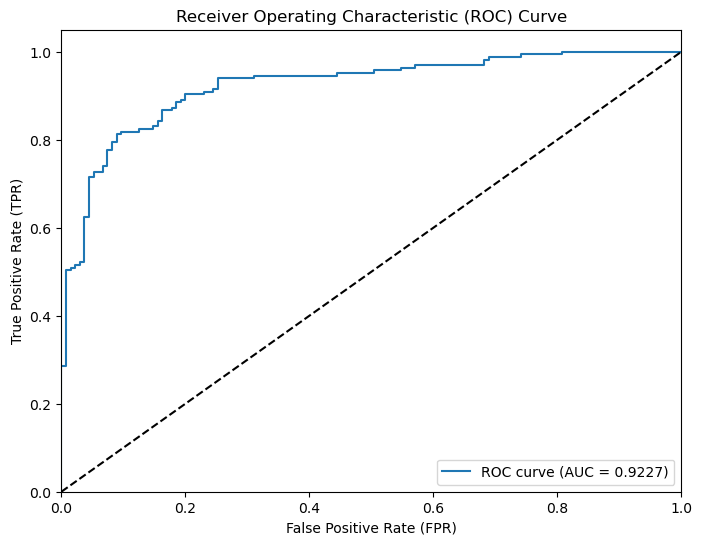

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#  **16. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy**

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model with a custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, solver='liblinear')  # C is the inverse of regularization strength
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {accuracy:.4f}")

# Train with default C to show the difference
model_default = LogisticRegression(solver='liblinear')
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default C=1.0: {accuracy_default:.4f}")

# Example using other C values.
model_c_01 = LogisticRegression(C=0.1, solver='liblinear')
model_c_01.fit(X_train, y_train)
y_pred_c_01 = model_c_01.predict(X_test)
accuracy_c_01 = accuracy_score(y_test, y_pred_c_01)
print(f"Accuracy with C=0.1: {accuracy_c_01:.4f}")

model_c_10 = LogisticRegression(C=10.0, solver='liblinear')
model_c_10.fit(X_train, y_train)
y_pred_c_10 = model_c_10.predict(X_test)
accuracy_c_10 = accuracy_score(y_test, y_pred_c_10)
print(f"Accuracy with C=10.0: {accuracy_c_10:.4f}")

Accuracy with C=0.5: 0.8467
Accuracy with default C=1.0: 0.8467
Accuracy with C=0.1: 0.8533
Accuracy with C=10.0: 0.8433


# **17. Write a Python program to train Logistic Regression and identify important features based on model coefficients**

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a sample dataset (you can replace this with your own)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Create feature names for better interpretation
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names) #create dataframe.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Get the coefficients (feature importance)
coefficients = model.coef_[0]  # Access the coefficients

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})

# Sort features by absolute coefficient value (magnitude)
feature_importance['abs_coefficient'] = np.abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance[['feature', 'coefficient']])

#Example showing how to only get the top 3 most important features.
print("\nTop 3 Important Features:")
print(feature_importance[['feature', 'coefficient']].head(3))

Feature Importance:
     feature  coefficient
6  feature_6     1.611670
2  feature_2    -0.741455
8  feature_8    -0.623727
0  feature_0    -0.450531
5  feature_5    -0.282814
1  feature_1     0.112276
3  feature_3     0.082690
4  feature_4    -0.069026
9  feature_9     0.059699
7  feature_7    -0.007809

Top 3 Important Features:
     feature  coefficient
6  feature_6     1.611670
2  feature_2    -0.741455
8  feature_8    -0.623727


# **18. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score**

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")

# Example showing how to use other parameters of cohen_kappa_score.
# For example, weights.
kappa_linear = cohen_kappa_score(y_test, y_pred, weights='linear')
print(f"Cohen's Kappa Score with linear weights: {kappa_linear:.4f}")

Cohen's Kappa Score: 0.6927
Cohen's Kappa Score with linear weights: 0.6927


#  **19. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification**

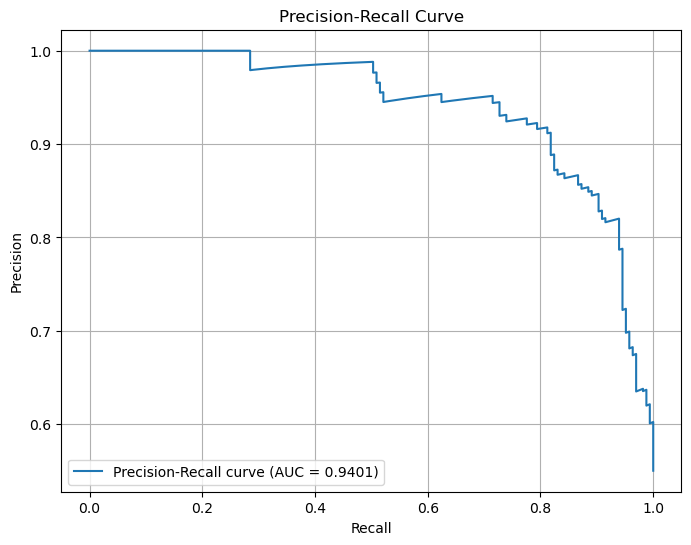

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate area under the Precision-Recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {auc_pr:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# **20. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy**

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the solvers to test
solvers = ['liblinear', 'saga', 'lbfgs']

# Train and evaluate Logistic Regression for each solver
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=10000)  # Increase max_iter for convergence
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with solver '{solver}': {accuracy:.4f}")
    except Exception as e:
        print(f"Solver '{solver}' encountered an error: {e}")

# Example using saga with elasticnet penalty.
model_saga_elasticnet = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=10000)
model_saga_elasticnet.fit(X_train,y_train)
y_pred_saga_elasticnet = model_saga_elasticnet.predict(X_test)
accuracy_saga_elasticnet = accuracy_score(y_test, y_pred_saga_elasticnet)
print(f"Accuracy with solver 'saga' and elasticnet penalty: {accuracy_saga_elasticnet:.4f}")

Accuracy with solver 'liblinear': 0.8467
Accuracy with solver 'saga': 0.8467
Accuracy with solver 'lbfgs': 0.8467
Accuracy with solver 'saga' and elasticnet penalty: 0.8467


# **21. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)**

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

#Example showing how MCC is good for imbalanced datasets.
X_imbalanced, y_imbalanced = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced, y_imbalanced, test_size=0.3, random_state=42)
model_imbalanced = LogisticRegression(solver='liblinear')
model_imbalanced.fit(X_train_imbalanced, y_train_imbalanced)
y_pred_imbalanced = model_imbalanced.predict(X_test_imbalanced)
mcc_imbalanced = matthews_corrcoef(y_test_imbalanced, y_pred_imbalanced)
print(f"MCC for imbalanced dataset: {mcc_imbalanced:.4f}")

from sklearn.metrics import accuracy_score
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
print(f"Accuracy for imbalanced dataset: {accuracy_imbalanced:.4f}")

Matthews Correlation Coefficient (MCC): 0.6950
MCC for imbalanced dataset: 0.5306
Accuracy for imbalanced dataset: 0.9100


#  **22. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling**

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Train on Raw Data ---
model_raw = LogisticRegression(solver='liblinear')
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on Raw Data: {accuracy_raw:.4f}")

# --- Train on Standardized Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on Standardized Data: {accuracy_scaled:.4f}")

# --- Comparison ---
print("\nComparison:")
print(f"Raw Data Accuracy:        {accuracy_raw:.4f}")
print(f"Standardized Data Accuracy: {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_raw:
    print("\nStandardization improved accuracy.")
elif accuracy_scaled < accuracy_raw:
    print("\nStandardization decreased accuracy (possible, but rare).")
else:
    print("\nStandardization did not change accuracy.")

#Example using pipeline.

from sklearn.pipeline import Pipeline

pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

pipeline_scaled.fit(X_train, y_train)
y_pred_pipeline = pipeline_scaled.predict(X_test)
accuracy_pipeline = accuracy_score(y_test,y_pred_pipeline)
print(f"\nAccuracy using Pipeline: {accuracy_pipeline:.4f}")

Accuracy on Raw Data: 0.8467
Accuracy on Standardized Data: 0.8467

Comparison:
Raw Data Accuracy:        0.8467
Standardized Data Accuracy: 0.8467

Standardization did not change accuracy.

Accuracy using Pipeline: 0.8467


#  **23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling**

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Logistic Regression on Raw Data ---
model_raw = LogisticRegression(solver='liblinear')
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy on Raw Data: {accuracy_raw:.4f}")

# --- Logistic Regression on Standardized Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy on Standardized Data: {accuracy_scaled:.4f}")

# --- Compare Accuracies ---
print("\nAccuracy Comparison:")
print(f"Raw Data Accuracy:        {accuracy_raw:.4f}")
print(f"Standardized Data Accuracy: {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_raw:
    print("\nFeature scaling (Standardization) improved accuracy.")
elif accuracy_scaled < accuracy_raw:
    print("\nFeature scaling (Standardization) decreased accuracy (possible, but rare).")
else:
    print("\nFeature scaling (Standardization) did not change accuracy.")

# --- Example using pipeline ---
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
print(f"\nAccuracy using Pipeline: {accuracy_pipeline:.4f}")

Accuracy on Raw Data: 0.8467
Accuracy on Standardized Data: 0.8467

Accuracy Comparison:
Raw Data Accuracy:        0.8467
Standardized Data Accuracy: 0.8467

Feature scaling (Standardization) did not change accuracy.

Accuracy using Pipeline: 0.8467


#  **24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation**

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for C values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Perform GridSearchCV to find the optimal C value
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best C value and the best model
best_c = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best C value: {best_c}")
print(f"Accuracy with best C: {accuracy:.4f}")

#Example showing how to use other metrics in GridSearchCV.
from sklearn.metrics import roc_auc_score

grid_search_roc_auc = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search_roc_auc.fit(X_train, y_train)
best_c_roc_auc = grid_search_roc_auc.best_params_['C']
best_model_roc_auc = grid_search_roc_auc.best_estimator_
y_prob_roc_auc = best_model_roc_auc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_roc_auc)

print(f"\nBest C value (ROC-AUC): {best_c_roc_auc}")
print(f"ROC-AUC with best C: {roc_auc:.4f}")

Best C value: 0.01
Accuracy with best C: 0.8533

Best C value (ROC-AUC): 0.1
ROC-AUC with best C: 0.9232


#  **25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to  make predictions**